# Workshop 5: PDF sampling and Statistics

**Submit this notebook to bCourses to receive a grade for this Workshop.**

Please complete workshop activities in code cells in this iPython notebook. The activities titled **Practice** are purely for you to explore Python, and no particular output is expected. Some of them have some code written, and you should try to modify it in different ways to understand how it works. Although no particular output is expected at submission time, it is _highly_ recommended that you read and work through the practice activities before or alongside the exercises. However, the activities titled **Exercise** have specific tasks and specific outputs expected. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook. 

**The workshop should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files).**

## Preview: generating random numbers

We will discuss simulations in greater detail later in the semester. The first step in simulating nature -- which, despite Einstein's objections, is playing dice after all -- is to learn how to generate some numbers that appear random. Of course, computers cannot generate true random numbers -- they have to follow an algorithm. But the algorithm may be based on something that is difficult to predict (e.g. the time of day you are executing this code) and therefore *look* random to a human. Sequences of such numbers are called *pseudo-random*. 

The random variables you generate will be distributed according to some *Probability Density Function* (PDF). The most common PDF is *flat*: $f(x)=\frac{1}{b-a}$ for $x\in [a..b)$. Here is how to get a random number uniformly distributed between $a=0$ and $b=1$ in Python:

In [11]:
# standard preamble
import numpy as np   
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# generate one random number between [0,1)
x = np.random.rand()
print ('x=', x)

# generate an array of 10 random numbers between [0,1)
array = np.random.rand(10)
print (array)

x= 0.28024392570499324
[0.86735815 0.71587031 0.76155211 0.11515909 0.382467   0.39910549
 0.14998437 0.89269375 0.05177925 0.42394747]


You can generate a set of randomly-distributed integer values instead:

In [13]:
a = np.random.randint(0,1000,10)  
print(a)

[912 544 873 834 704 236 853 997 701 496]


# 1d distributions

## Moments of the distribution

Python's SciPy library contains a set of standard statistical functions. See a few examples below:

[102.69573762 139.76392203 136.59853026 172.4372209  128.65311115
 140.58511605 188.99024828 133.71339416 129.91617063 120.75588524]
Mean =   146
Median =   145
Standard deviation =  28.2


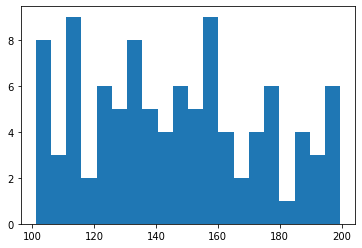

In [14]:
# create a set of data and compute mean and variance
# This creates an array of 100 elements, uniformly-distributed between 100 and 200

# Try changing the size parameter!
x = np.random.uniform(low=100,high=200,size=100)

print(x[0:10])
# make a histogram
n, bins, patches = plt.hist(x, 20)

# various measures of "average value":
print('Mean = {0:5.0f}'.format(np.mean(x)))
print( 'Median = {0:5.0f}'.format(np.median(x)))

# measure of the spread
print('Standard deviation = {0:5.1f}'.format(np.std(x)))


### Exercise 1

We just introduced some new functions: `np.random.rand()`, `np.random.uniform()`, `plt.hist()`, `np.mean()`, and `np.median()`. So let's put them to work. You may also find `np.cos()`, `np.sin()`, and `np.std()` useful.

1. Generate 100 random numbers, uniformly distributed between [-$\pi,\pi$)
1. Plot them in a histogram.
1. Compute mean and standard deviation (RMS) 
1. Plot a histogram of sin(x) and cos(x), where x is a uniformly distributed random number between [-$\pi$,$\pi$). Do you understand this distribution ? 

In [ ]:
# Your code for Exercise 1

## Gaussian/Normal distribution

You can also generate Gaussian-distributed numbers. Remember that a Gaussian (or Normal) distribution is a probability distribution given by 

$$P(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where $\mu$ is the average of the distribution and $\sigma$ is the standard deviation. The **standard** normal distribution is a special case with $\mu = 0$ and $\sigma = 1$.

In [ ]:
# generate a single random number, gaussian-distributed with mean=0 and sigma=1. This is also called 
# a standard normal distribution
x = np.random.standard_normal()
print (x)

# generate an array of 10 such numbers
a = np.random.standard_normal(size=10)
print (a)

### Exercise 2
We now introduced `np.random.standard_normal()`.

1. Generate $N=100$ random numbers, Gaussian-distributed with $\mu=0$ and $\sigma=1$. 
2. Plot them in a histogram. 
3. Compute the mean, standard deviation (RMS), and standard error on the mean.

The standard error on the mean is defined as $\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}$, where $\sigma$ is the standard deviation.


In [ ]:
# Your code for Exercise 2

4. Now find the means of $M=1000$ experiments of $N=100$ measurements each (you'll end up generating 100,000 random numbers total). Plot a histogram of the means. Is it consistent with your calculation of the error on the mean for $N=100$ ? About how many experiments yield a result within $1\sigma_{\mu}$ of the true mean of 0 ? About how many are within $2\sigma_{\mu}$ ?
5. Now repeat question 4 for $N=10,50,1000,10000$. Plot a graph of the RMS of the distribution of the means vs $N$. Is it consistent with your expectations ? 

## Exponential distribution

In this part we will repeat the above process, but now using lists of exponentially distributed random numbers. The probability of selecting a random number between $x$ and $x+dx$ is $\propto e^{-x}dx$. Exponential distributions often appear in lossy systems, e.g. if you plot an amplitude of a damped oscillator as a function of time. Or you may see it when you plot the number of decays of a radioactive isotope as a function of time. 

In [ ]:
# generate a single random number, exponentially-distributed with scale=1. 
x = np.random.exponential()
print (x)

# generate an array of 10 such numbers
a = np.random.exponential(size=10)
print (a)

### Exercise 3
We now introduced `np.random.exponential()`. This function can take up to two keywords, one of which is `size` as shown above. The other is `scale`. Use the documentation and experiment with this exercise to see what it does.

1. What do you expect to be the mean of the distribution? What do you expect to be the standard deviation?
1. Generate $N=100$ random numbers, exponentially-distributed with the keyword `scale` set to 1. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?
1. Now find the means, standard deviations, and errors on the means for each of the $M=1000$ experiments of $N=100$ measurements each. Plot a histogram of each quantity. Is the RMS of the distribution of the means consistent with your calculation of the error on the mean for $N=100$ ? 
1. Now repeat question 5 for $N=10,100,1000,10000$. Plot a graph of the RMS of the distribution of the means vs $N$. Is it consistent with your expectations ? This is a demonstration of the *Central Limit Theorem*


In [ ]:
# Your code for Exercise 3

## Binomial distribution
The binomial distribution with parameters $n$ and $p$ is the *discrete* probability distribution of the number of successes in a sequence of $n$ independent yes/no experiments, each of which yields success with probability $p$. A typical example is a distribution of the number of *heads* for $n$ coin flips ($p=0.5$) 

In [ ]:
# Simulates flipping 1 fair coin  one time. Returns 0 for heads and 1 for tails
p = 0.5
print (np.random.binomial(1,p))

# Simulates flipping 5 biased coins three times
p = 0.7
print (np.random.binomial(5,p, size=3))

### Exercise 4
We now introduced the function `np.random.binomial(n,p)` which requires two arguments, `n` the number of coins being flipped in a single trial and `p` the probability that a particular coin lands tails. As usual, `size` is another optional keyword argument.
1. Generate an array of outcomes for flipping 1 unbiased coin 10 times.
1. Plot the outcomes in a histogram (0=heads, 1=tails). 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?


In [ ]:
# Your code for Exercise 4

## Poisson distribution
The Poisson distribution is a *discrete* probability distribution that expresses the probability of a given number of events $n$ occurring in a fixed interval of time $T$ if these events occur with a known average rate $\nu/T$ and independently of the time since the last event. The *expectation value* of $n$ is $\nu$. The variance of $n$ is also $\nu$, so the standard deviation of $n$ is $\sigma(n) = \sqrt{\nu}$

In [ ]:
nu = 10 # expected number of events
n = np.random.poisson(nu)  # generate a Poisson-distributed number.
print (n)

### Exercise 5
We introduced `np.random.poisson()`. As usual, you can use the keyword argument `size` to draw multiple samples.
1. Generate $N=100$ random numbers, Poisson-distributed with $\nu=10$. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?
1. Now repeat question 3 for $\nu=1,5,100,10000$. Plot a graph of the RMS vs $\nu$. Is it consistent with your expectations ? 


In [ ]:
# Your code for Exercise 5

## Doing something "useful" with a distribution

[Random walks](https://en.wikipedia.org/wiki/Random_walk) show up when studying statistical mechanics (and many other fields).  The simplest random walk is this:

Imagine a person stuck walking along a straight line.  Each second, they randomly step either 1 meter forward or 1 meter backward. 

With this in mind, you can start to ask many different questions.  After one minute, how far do they end up from their starting point?  How many times do they cross the starting point?  (The exact answers require repeating this "experiment" many times and taking an average across all the trials.)  How much do you have to pay someone to walk along this line for several hours?

There are lots of interesting ways to generalize this problem.  You can extend the random walk to 2+ dimensions, make stepping in some directions more likely than others, draw the step sizes from some probability distribution, etc.  If you're curious, it's fun to plot the paths of 2D random walks to visualize Brownian motion.



### Exercise 6

Use `np.random.binomial(1, 0.5)` (or some other random number generator) to simulate a random walk along one dimension (the numbers from the binomial distribution signify either stepping forward or backward).  It would be helpful to write a function that takes $N$ steps in the random walk, and then returns the distance from the starting point. 

In [ ]:
def random_walk(N):
    
    '''This function will return the distance from the starting point
       after a 1-dimensional random walk of N steps'''
    
    # Use np.random.binomial(1,0.5) or another np.random function to "simulate" the random walk

Now that you have a function that simulates a single random walk for a given $N$, write a function (or just some lines of code) that simulates $M = 1000$ of these random walks and returns the mean (average) distance traveled for a given $N$.

In [ ]:
def average_distance(N):
    
    '''This function simulates 1000 random walks of N steps
       and then returns the average distance from the start.'''
    
    # Use the random_walk(N) function 1000 times and return the average of the results

It turns out that you can now use these random walk simulations to estimate the value of $\pi$ (although in an extremely inefficient way).  For values of $N$ from 1 to 50, use your functions/code to find the mean distance $D$ after $N$ steps.  Then make a plot of $D^2$ vs $N$.  If you've done it correctly, the plot should be a straight line with a slope of $\frac{2}{\pi}$.

Once we get to fitting in Python, you could find the slope and solve for $\pi$.  For now, just draw the line $\frac{2 N}{\pi}$ over your simulated data.